# Exercise - Logistic Regression

The client bank *XYZ* is running a direct marketing (phone calls) campaign. The classification goal is to predict if the client will subscribe a term deposit or not.

The data is obtained from [UCI Machine Learning repository]( http://mlr.cs.umass.edu/ml/datasets/Bank+Marketing)

### Attribute Information:

#### bank client data:
- **age**: (numeric)
- **job** : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
- **marital** : marital status (categorical: 'divorced', 'married', 'single', 'unknown'; note: 'divorced' means divorced or widowed)
- **education** (categorical: 'basic.4y', 'basic.6y', 'basic.9y','high.school', 'illiterate' ,'professional.course', 'university.degree', 'unknown')
- **default**: has credit in default? (categorical: 'no','yes','unknown')
- **housing: has housing loan? (categorical: 'no','yes','unknown')
- **loan**: has personal loan? (categorical: 'no','yes','unknown')

#### related with the last contact of the current campaign:
- **contact**: contact communication type (categorical: 'cellular', 'telephone') 
- **month**: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
- **day**: last contact day of the month (numerical: 1, 2, 3, 4, ...)
- **duration**: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

#### other attributes:
- **campaign**: number of contacts performed during this campaign and for this client (numeric, includes last contact)
- **pdays**: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
- **previous**: number of contacts performed before this campaign and for this client (numeric)
- **poutcome**: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

#### Output variable (desired target):
- **deposit** - has the client subscribed a term deposit? (binary: 'yes','no')



In [1]:
#1. import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (10, 6)

In [2]:
#2. import data
bank = pd.read_csv("data/bank.csv")

In [3]:
#3. Display first few records
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [4]:
#4. check column names
bank.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')

In [5]:
#5. do label encoding
from sklearn import preprocessing

In [6]:
bank_e = bank.apply(preprocessing.LabelEncoder().fit_transform)

In [7]:
#6. do some exploratory data analysis
bank_e.head()


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,41,0,1,1,0,2288,1,0,2,4,8,1021,0,0,0,3,1
1,38,0,1,1,0,469,0,0,2,4,8,1283,0,0,0,3,1
2,23,9,1,1,0,1618,1,0,2,4,8,1246,0,0,0,3,1
3,37,7,1,1,0,2356,1,0,2,4,8,577,0,0,0,3,1
4,36,0,1,2,0,608,0,0,2,4,8,671,1,0,0,3,1


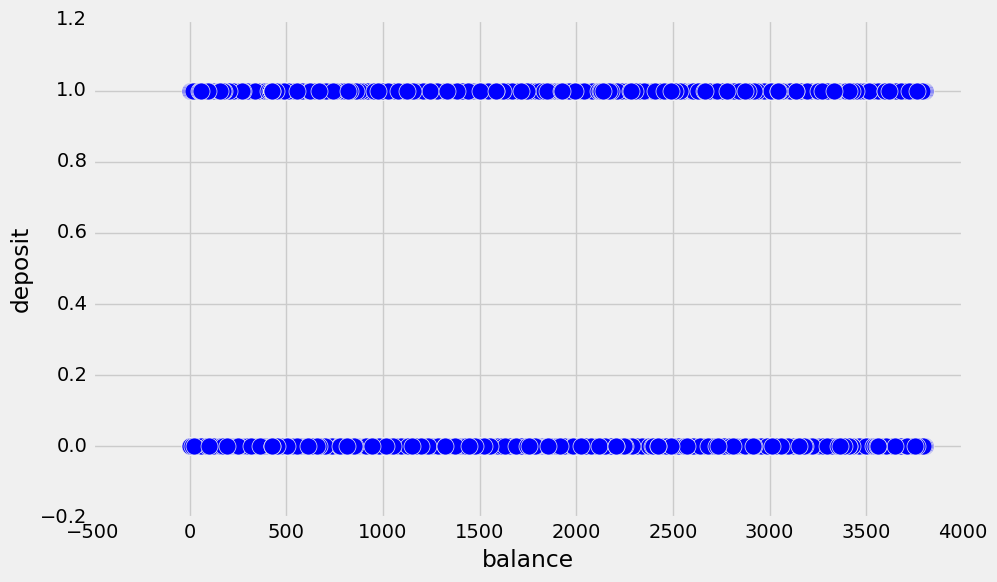

In [8]:
#Plot balance vs deposit
plt.scatter(bank_e.balance, 
bank_e.deposit,
           s=150)
plt.xlabel('balance')
plt.ylabel('deposit')

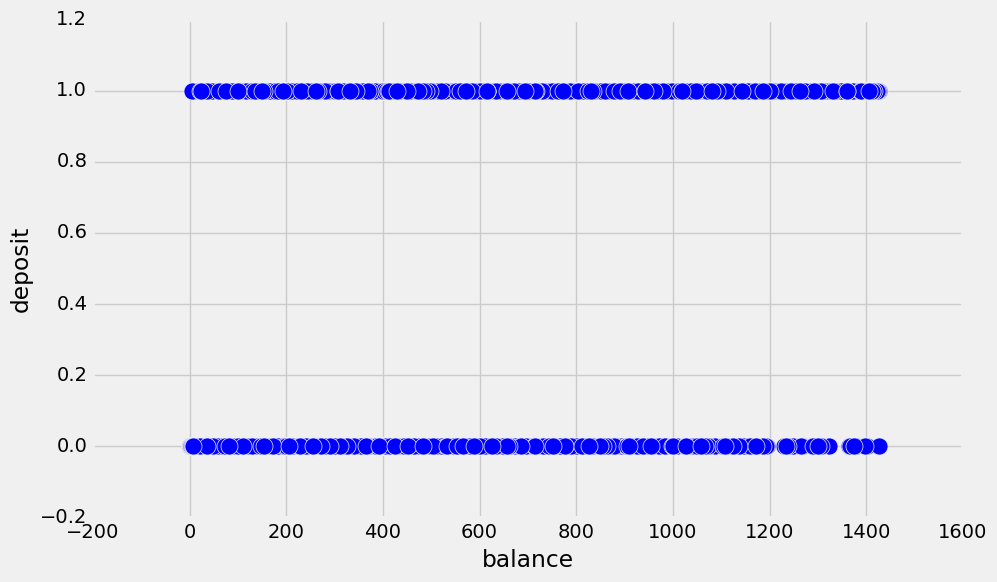

In [9]:
#Plot duration vs deposit
plt.scatter(bank_e.duration, 
bank_e.deposit,
           s=150)
plt.xlabel('balance')
plt.ylabel('deposit')

In [10]:
#7. Build logistic regression model
from sklearn.linear_model import LogisticRegression

In [11]:
#8. Build L2 logistic regression model
model_logistic_l2 = LogisticRegression()

In [12]:
model_logistic_l2.fit(bank_e.iloc[:,:16], bank_e.iloc[:,16])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [13]:
model_logistic_l2.coef_

array([[  5.39131423e-03,   1.04630926e-02,   1.82253065e-01,
          2.05163223e-01,  -2.83499942e-01,   2.25858269e-04,
         -1.06173681e+00,  -7.03062975e-01,  -6.74726785e-01,
         -9.53047484e-03,   3.30559565e-02,   5.22986138e-03,
         -1.31484677e-01,   3.32804702e-03,   1.27949904e-01,
          1.69222679e-01]])

In [14]:
#9. Build L1 logistic regression model

model_logistic_l1 = LogisticRegression(penalty="l1")

In [15]:
model_logistic_l1.fit(bank_e.iloc[:,:16], bank_e.iloc[:,16])
model_logistic_l1.coef_

array([[  5.62204522e-03,   1.08722084e-02,   1.85516456e-01,
          2.07293217e-01,  -2.58272079e-01,   2.28094656e-04,
         -1.06078174e+00,  -6.86212414e-01,  -6.75458792e-01,
         -9.38798206e-03,   3.34503745e-02,   5.23595218e-03,
         -1.31234717e-01,   3.37434296e-03,   1.28626865e-01,
          1.74566923e-01]])

In [16]:
#10. Build L1 logistic regression model with different values of C
model_logistic_l1 = LogisticRegression(penalty="l1", C=0.001)
model_logistic_l1.fit(bank_e.iloc[:,:16], bank_e.iloc[:,16])
model_logistic_l1.coef_

array([[-0.01659869,  0.        ,  0.        ,  0.        ,  0.        ,
         0.00012844,  0.        ,  0.        ,  0.        , -0.03488104,
        -0.07538053,  0.00362568, -0.06279656,  0.00249069,  0.        ,
        -0.03541971]])

In [18]:
#10. Find generalization error. Use 80/20 split
from sklearn.cross_validation import train_test_split

In [19]:
x_train, x_test, y_train, y_test = train_test_split(bank_e.iloc[:,:16],
bank_e.iloc[:,16],test_size=0.2)

In [22]:
type(train_test_split(bank_e.iloc[:,:16], bank_e.iloc[:,16],test_size=0.2))

list

In [25]:
bank_e.shape, x_train.shape, y_train.shape, x_test.shape, y_test.shape

((11162, 17), (8929, 16), (8929,), (2233, 16), (2233,))

In [26]:
#Using L2 Logistic Regression

model_logistic_l2 = LogisticRegression()
model_logistic_l2.fit(x_train, y_train)
model_logistic_l2.coef_

array([[  5.54151087e-03,   1.36789433e-02,   2.01141115e-01,
          2.28293670e-01,  -2.42196203e-01,   2.05421093e-04,
         -1.06519532e+00,  -7.07532716e-01,  -6.62971576e-01,
         -1.23241517e-02,   3.08375020e-02,   5.37293247e-03,
         -1.32053481e-01,   3.61355118e-03,   1.34697585e-01,
          1.82823457e-01]])

In [23]:
#11. report mis-classification rate
l2_predict = model_logistic_l2.predict(x_test)

In [24]:
model_logistic_l2

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [40]:
report = pd.DataFrame([l2_predict, y_test]).T
report.columns = ["Prediction", "Actual"]
report.head()

,Prediction,Actual
0,0,0
1,1,0
2,1,1
3,1,1
4,1,0


In [46]:
report.match = (report.Prediction == report.Actual)

In [51]:
misclassification_rate = 100 - report.match.sum()/report.shape[0]*100

In [52]:
print(misclassification_rate)

20.6000895656
